In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv("./spam.csv", encoding="latin-1")

In [6]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [9]:
data.rename(columns = {"v1":"type", "v2":"email_content"}, inplace=True)
data.head()

,type,email_content,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [11]:
data.shape

(5572, 5)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
data_train, data_test, label_train, label_test = train_test_split(
    data.email_content, 
    data.type, 
    test_size=0.2, 
    random_state=0)

In [14]:
print(data_train.shape, 
      data_test.shape, 
      label_train.shape, 
      label_test.shape,
      sep = ",")

(4457,),(1115,),(4457,),(1115,)


In [15]:
data_train.head()

1114    No no:)this is kallis home ground.amla home to...
3589    I am in escape theatre now. . Going to watch K...
3095    We walked from my moms. Right on stagwood pass...
1012       I dunno they close oredi not... ÌÏ v ma fan...
3320                               Yo im right by yo work
Name: email_content, dtype: object

In [16]:
data_test.head()

4456    Aight should I just plan to come up later toni...
690                                    Was the farm open?
944     I sent my scores to sophas and i had to do sec...
3768    Was gr8 to see that message. So when r u leavi...
1189    In that case I guess I'll see you at campus lodge
Name: email_content, dtype: object

In [17]:
label_train.head()

1114    ham
3589    ham
3095    ham
1012    ham
3320    ham
Name: type, dtype: object

In [18]:
label_test.head()

4456    ham
690     ham
944     ham
3768    ham
1189    ham
Name: type, dtype: object

#prepare the data

#count the number of words in the training data

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
# this class is to Convert a collection of text documents to a matrix of token counts
# fit_transform: Learn the vocabulary dictionary and return term-document matrix.
# transform: Transform documents to document-term matrix. Extract token counts out of 
# raw text documents using the vocabulary fitted with fit or the one provided to the constructor.

In [26]:
vectorizer = CountVectorizer()
data_train_word_matrix = vectorizer.fit_transform(data_train)
data_test_word_matrix  = vectorizer.transform(data_test)
# dont need fit as, the dictionary is from the train data, no need to get the dictionary from the test

#start of training

In [37]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (accuracy_score, 
                            classification_report,
                            confusion_matrix)

In [27]:
model = MultinomialNB()
model.fit(data_train_word_matrix, label_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

#do prediction

In [31]:
prediction = model.predict(data_test_word_matrix)
prediction

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype='<U4')

(array([959.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 156.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

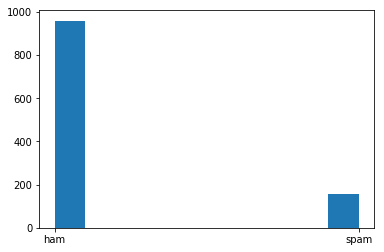

In [33]:
plt.hist(prediction)

In [39]:
from sklearn.model_selection import cross_val_score

In [41]:
accuracy_score(label_test, prediction)

0.9874439461883409

In [42]:
classification_report(label_test, prediction)

'             precision    recall  f1-score   support\n\n        ham       0.99      1.00      0.99       949\n       spam       0.99      0.93      0.96       166\n\navg / total       0.99      0.99      0.99      1115\n'

In [43]:
confusion_matrix(label_test, prediction)

array([[947,   2],
       [ 12, 154]])

In [44]:
cross_val = cross_val_score(model, 
                            data_train_word_matrix, 
                            label_train, 
                            cv = 20, 
                            scoring = "accuracy")
print(cross_val)
print(cross_val.mean())

[0.99553571 0.97309417 0.96860987 0.97757848 0.97757848 0.98654709
 0.99103139 0.99103139 0.98206278 0.98654709 0.98206278 0.98654709
 0.98206278 0.98206278 0.97309417 0.99103139 0.96846847 0.97747748
 0.99099099 0.98648649]
0.9824950420872508







#how to use vectorizer

In [49]:
vect = CountVectorizer()
example = ["i love you, good bad bad", " you are so good"]

result = vect.fit_transform(example)

print(result)

  (0, 1)	2
  (0, 2)	1
  (0, 5)	1
  (0, 3)	1
  (1, 4)	1
  (1, 0)	1
  (1, 2)	1
  (1, 5)	1


In [48]:
print(vect.vocabulary_)

{'love': 3, 'you': 5, 'good': 2, 'bad': 1, 'are': 0, 'so': 4}
